# Example usage of SEOBNRv4PHM surrogate model.

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline

import gwsurrogate

cannot import LAL
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


## Download surrogate data, this only needs to be done once

In [2]:
# This can take a few minutes
# gwsurrogate.catalog.pull('SEOBNRv4PHMSur')

'/Users/vijay/src/gwsurrogate/gwsurrogate/surrogate_downloadsNRSur7dq4.h5'

## Load the surrogate, this only needs to be done once at the start of a script

In [2]:
sur = gwsurrogate.LoadSurrogate('SEOBNRv4PHMSur')

Loaded SEOBNRv4PHMSur model


In [3]:
sur.__dict__['_sur_dimless'].mode_list

[(2, 1),
 (2, -1),
 (2, 2),
 (2, -2),
 (3, 3),
 (3, -3),
 (4, 4),
 (4, -4),
 (5, 5),
 (5, -5)]

## Read the documentation

In [4]:
 help(sur)

Help on SEOBNRv4PHMSur in module gwsurrogate.surrogate object:

class SEOBNRv4PHMSur(SurrogateEvaluator)
 |  SEOBNRv4PHMSur(h5filename)
 |  
 |  A class for the SEOBNRv4PHM surrogate models.
 |  
 |  Evaluates gravitational waveforms generated by precessing binary black hole
 |  systems with generic mass ratios and spins.
 |  
 |  This model includes the following spin-weighted spherical harmonic modes:
 |  2<=ell<=5, -ell<=m<=ell in inertial frame.
 |  
 |  The parameter space of validity is:
 |  q \in [1, 20], and |chi1|,|chi2| \in [-0.99, 0.99], with generic directions.
 |  where q is the mass ratio and chi1/chi2 are the spin vectors of the
 |  heavier/lighter BH, respectively.
 |  
 |  The surrogate has been trained in the range
 |  q \in [1, 20] and |chi1|/|chi2| \in [-0.8, 0.8], but produces reasonable
 |  waveforms in the above range and has been tested against existing
 |  NR waveforms in that range.
 |  
 |  See the __call__ method on how to evaluate waveforms.
 |  In the __ca

## Evaluate the waveform

### Evaluate waveform modes in dimensionless units (default)

In [4]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
dt = 0.1        # timestep size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)   # dyn stands for dynamics, do dyn.keys() to see contents

In [5]:
# Let's see all available modes
print( sorted(h.keys()) )

[(2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3), (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, -5), (5, -4), (5, -3), (5, -2), (5, -1), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


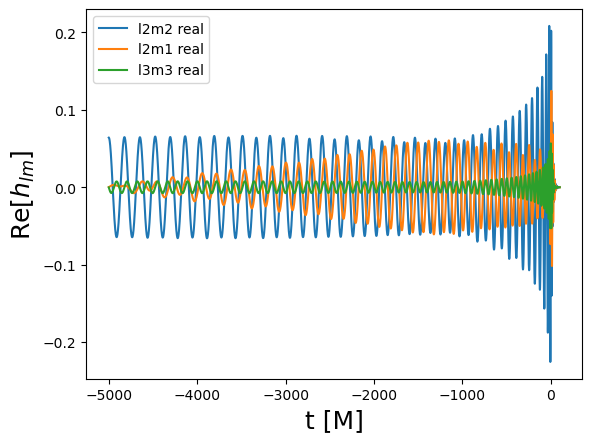

In [6]:
P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

### Evaluate waveform modes in physical units

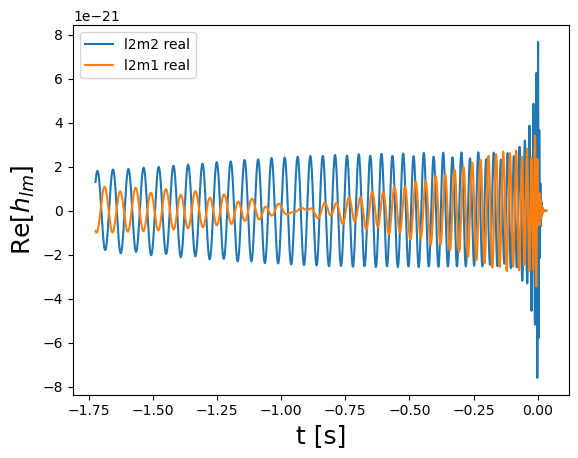

In [10]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use

# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

### Evaluate waveform at a point on the sky

Text(0.5, 0, 't [s]')

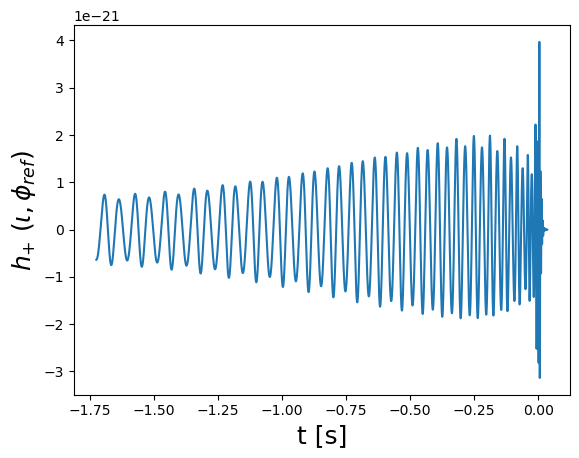

In [11]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use
inclination = np.pi/4
phi_ref = np.pi/5

# Will only include modes ell<=ellMax
# Returns h = h_+ -i h_x at (inclination, phi_ref) in the sky of the source frame
# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks')

P.plot(t, h.real)
P.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
P.xlabel('t [s]', fontsize=18)

## Dynamics Surrogate

In [12]:
q = 4
chiA = [-0.2, 0.4, 0.1]  # unless f_ref is given the spins are assumed to be given at the start of the waveform
chiB = [-0.5, 0.2, -0.4]
dt = 0.1        # step size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, precessing_opts={'return_dynamics': True})        # dyn stands for dynamics, do dyn.keys() to see contents

In [13]:
# See all available dynamics data
dyn.keys()

dict_keys(['chiA', 'chiB', 'chiA_copr', 'chiB_copr', 'q_copr', 'orbphase'])

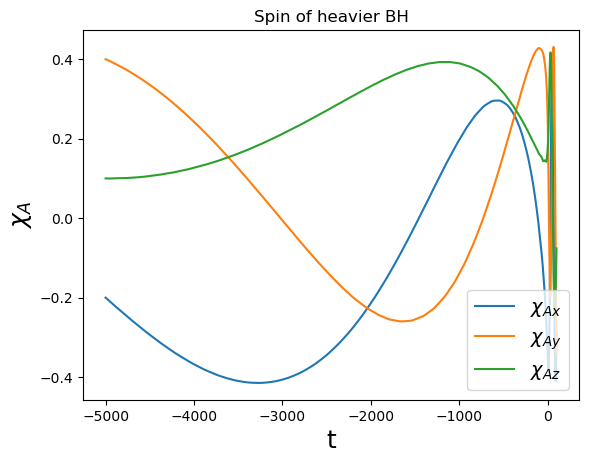

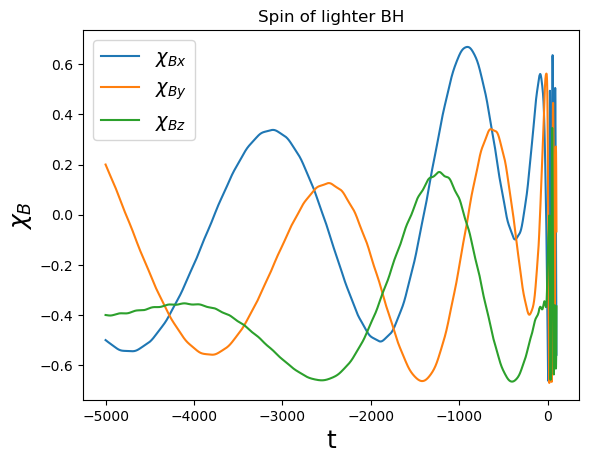

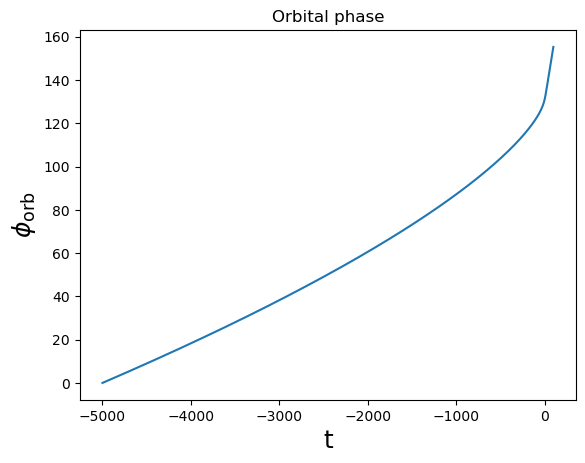

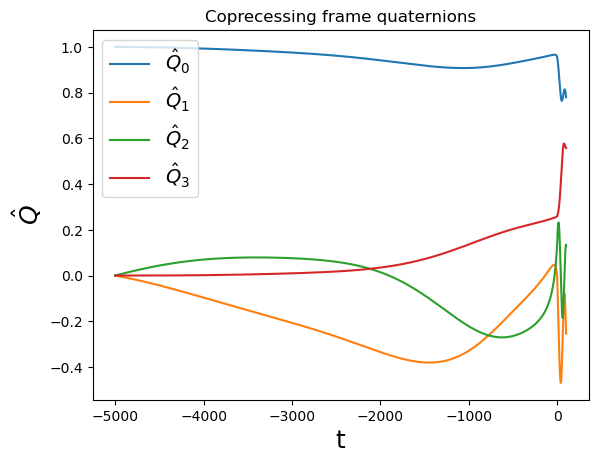

In [14]:
P.figure(1)
P.plot(t, dyn['chiA'][:,0], label='$\chi_{Ax}$')
P.plot(t, dyn['chiA'][:,1], label='$\chi_{Ay}$')
P.plot(t, dyn['chiA'][:,2], label='$\chi_{Az}$')
P.ylabel('$\chi_A$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of heavier BH')
P.legend(fontsize=14)

P.figure(2)
P.plot(t, dyn['chiB'][:,0], label='$\chi_{Bx}$')
P.plot(t, dyn['chiB'][:,1], label='$\chi_{By}$')
P.plot(t, dyn['chiB'][:,2], label='$\chi_{Bz}$')
P.ylabel('$\chi_B$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of lighter BH')
P.legend(fontsize=14)

P.figure(3)
P.plot(t, dyn['orbphase'][:,])
P.ylabel('$\phi_{\mathrm{orb}}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Orbital phase')

P.figure(4)
P.plot(t, dyn['q_copr'][0,:], label='$\hat{Q}_0$')
P.plot(t, dyn['q_copr'][1,:], label='$\hat{Q}_1$')
P.plot(t, dyn['q_copr'][2,:], label='$\hat{Q}_2$')
P.plot(t, dyn['q_copr'][3,:], label='$\hat{Q}_3$')
P.ylabel('$\hat{Q}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Coprecessing frame quaternions')
P.legend(fontsize=14)

# Going further: Comparison between NRSur7dq4 and SEOBNRv4PHMSur

NOTE: to compuate matches, we need PyCBC. It can installed via pip using 

```bash
>>> pip install pycbc
```

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.color_palette("colorblind")
from seaborn.palettes import SEABORN_PALETTES
colors = SEABORN_PALETTES["colorblind"]

import matplotlib.pyplot as P
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
eob_sur = gwsurrogate.LoadSurrogate('SEOBNRv4PHMSur')
nr_sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

### Evaluate waveform modes in dimensionless units (default)

In [ ]:
# Some parameters to match waveforms for

# Remember:
## NRsur extrapolated for 4 < q < 6
## Both models extrapolate for |chi_1,2| > 0.8
## Uncomment a single case to be used

# Within doamin
q = 3.9
chiA = [-0.2, 0.4, 0.3]
chiB = [-0.1, 0.5, -0.1]

## Extrapolate q
# q = 5.9
# chiA = [-0.2, 0.4, 0.1]
# chiB = [-0.5, 0.2, -0.2]

## Extrapolate spins
# q = 3.9
# chiA = [-0.2, 0.6, 0.7]
# chiB = [-0.5, 0.2, -0.7]

##extrapolate spins and q
# q = 5.9
# chiA = [-0.2, 0.6, 0.7]
# chiB = [-0.5, 0.2, -0.7]

In [ ]:
dt = 0.1        # timestep size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate
f_ref = 0.008

t_nr, h_nr, dyn_nr = nr_sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, precessing_opts = {'return_dynamics': True} )
t_eob, h_eob, dyn_eob = eob_sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, precessing_opts = {'return_dynamics': True}) 

# print(dyn_eob)

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
P.plot(t_nr, h_nr[(2,2)].real, label='l2m2 real: NR',c=colors[0])
P.plot(t_nr, h_nr[(2,1)].real, label='l2m1 real: NR',c=colors[1])
# P.plot(t_nr, h_nr[(3,3)].real, label='l3m3 real: NR',c=colors[2])

P.plot(t_eob, h_eob[(2,2)].real, label='l2m2 real: EOB', c=colors[0], ls='dashed')
P.plot(t_eob, h_eob[(2,1)].real, label='l2m1 real: EOB',c=colors[1], ls='dashed')
# P.plot(t_eob, h_eob[(3,3)].real, label='l3m3 real: EOB',c=colors[2], ls='dashed')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)


plt.subplot(1,2,2)
P.plot(t_nr, h_nr[(2,2)].real, label='l2m2 real: NR',c=colors[0])
P.plot(t_nr, h_nr[(2,1)].real, label='l2m1 real: NR',c=colors[1])
# P.plot(t_nr, h_nr[(3,3)].real, label='l3m3 real: NR',c=colors[2])

P.plot(t_eob, h_eob[(2,2)].real, label='l2m2 real: EOB', c=colors[0], ls='dashed')
P.plot(t_eob, h_eob[(2,1)].real, label='l2m1 real: EOB',c=colors[1], ls='dashed')
# P.plot(t_eob, h_eob[(3,3)].real, label='l3m3 real: EOB',c=colors[2], ls='dashed')
P.xlabel('t [M]', fontsize=18)
P.xlim(-100, 50)

P.legend()
plt.show()

In [ ]:
for k in h_nr:
    plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    P.plot(t_nr, h_nr[k].real, label='l{}m{} real: NR'.format(k[0], k[1]), c=colors[0])
    P.plot(t_nr, h_nr[k].imag, label='l{}m{} imag: NR'.format(k[0], k[1]), c=colors[0], ls='dashed')

    P.plot(t_eob, h_eob[k].real, label='l{}m{} real: EOB'.format(k[0], k[1]), c=colors[1])
    P.plot(t_eob, h_eob[k].imag, label='l{}m{} imag: EOB'.format(k[0], k[1]), c=colors[1], ls='dashed')
   
    P.ylabel('Re[$h_{lm}$]', fontsize=18)
    P.xlabel('t [M]', fontsize=18)


    plt.subplot(1,2,2)
    P.plot(t_nr, h_nr[k].real, label='l{}m{} real: NR'.format(k[0], k[1]), c=colors[0])
    P.plot(t_nr, h_nr[k].imag, label='l{}m{} imag: NR'.format(k[0], k[1]), c=colors[0], ls='dashed')

    P.plot(t_eob, h_eob[k].real, label='l{}m{} real: EOB'.format(k[0], k[1]), c=colors[1])
    P.plot(t_eob, h_eob[k].imag, label='l{}m{} imag: EOB'.format(k[0], k[1]), c=colors[1], ls='dashed')
   
    P.ylabel('Re[$h_{lm}$]', fontsize=18)
    P.xlabel('t [M]', fontsize=18)
    P.xlim(-100, 50)

    P.legend()
    plt.show()

In [ ]:
P.figure(1,  figsize=(10, 6))
P.plot(t_nr, dyn_nr['chiA'][:,0], label='$\chi_{Ax}$: NR', c=colors[0])
P.plot(t_nr, dyn_nr['chiA'][:,1], label='$\chi_{Ay}$: NR', c=colors[1])
P.plot(t_nr, dyn_nr['chiA'][:,2], label='$\chi_{Az}$: NR', c=colors[2])

P.plot(t_eob, dyn_eob['chiA'][:,0], label='$\chi_{Ax}$: EOB', c=colors[0], ls='dashed')
P.plot(t_eob, dyn_eob['chiA'][:,1], label='$\chi_{Ay}$: EOB', c=colors[1], ls='dashed')
P.plot(t_eob, dyn_eob['chiA'][:,2], label='$\chi_{Az}$: EOB', c=colors[2], ls='dashed')

P.ylabel('$\chi_A$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of heavier BH')
P.legend(fontsize=14)

P.figure(2,figsize=(10, 6))
P.plot(t_nr, dyn_nr['chiB'][:,0], label='$\chi_{Bx}$: NR',c=colors[3])
P.plot(t_nr, dyn_nr['chiB'][:,1], label='$\chi_{By}$: NR',c=colors[4])
P.plot(t_nr, dyn_nr['chiB'][:,2], label='$\chi_{Bz}$: NR',c=colors[5])

P.plot(t_eob, dyn_eob['chiB'][:,0], label='$\chi_{Bx}$: EOB',c=colors[3], ls='dashed')
P.plot(t_eob, dyn_eob['chiB'][:,1], label='$\chi_{By}$: EOB',c=colors[4], ls='dashed')
P.plot(t_eob, dyn_eob['chiB'][:,2], label='$\chi_{Bz}$: EOB',c=colors[5], ls='dashed')

P.ylabel('$\chi_B$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of lighter BH')
P.legend(fontsize=14)

P.figure(3,figsize=(10, 6))
P.plot(t_nr, dyn_nr['orbphase'][:,],c=colors[0],label='NR')
P.plot(t_eob, dyn_eob['orbphase'][:,],c=colors[0],ls='dashed', label='EOB')
P.ylabel('$\phi_{\mathrm{orb}}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Orbital phase')

P.figure(4,figsize=(10, 6))
P.plot(t_nr, dyn_nr['q_copr'][0,:], label='$\hat{Q}_0$: NR',c=colors[6])
P.plot(t_nr, dyn_nr['q_copr'][1,:], label='$\hat{Q}_1$: NR',c=colors[7])
P.plot(t_nr, dyn_nr['q_copr'][2,:], label='$\hat{Q}_2$: NR',c=colors[8])
P.plot(t_nr, dyn_nr['q_copr'][3,:], label='$\hat{Q}_3$: NR',c=colors[9])

P.plot(t_eob, dyn_eob['q_copr'][0,:], label='$\hat{Q}_0$: EOB',c=colors[6], ls='dashed')
P.plot(t_eob, dyn_eob['q_copr'][1,:], label='$\hat{Q}_1$: EOB',c=colors[7], ls='dashed')
P.plot(t_eob, dyn_eob['q_copr'][2,:], label='$\hat{Q}_2$: EOB',c=colors[8], ls='dashed')
P.plot(t_eob, dyn_eob['q_copr'][3,:], label='$\hat{Q}_3$: EOB',c=colors[9], ls='dashed')
P.ylabel('$\hat{Q}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Coprecessing frame quaternions')
P.legend(fontsize=14)

### Evaluate waveform modes in physical units

In [ ]:
f_ref = 25        # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 25          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use

# dyn stands for dynamics, do dyn.keys() to see contents
# t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

t_nr, h_nr, dyn_nr = nr_sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')
t_eob, h_eob, dyn_eob = eob_sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks') 

P.figure(figsize=(20, 6))

plt.subplot(1,2,1)
P.plot(t_nr, h_nr[(2,2)].real, label='l2m2 real', c=colors[0])
P.plot(t_nr, h_nr[(2,1)].real, label='l2m1 real', c=colors[1])

P.plot(t_eob, h_eob[(2,2)].real, label='l2m2 real', ls='dashed', c=colors[0])
P.plot(t_eob, h_eob[(2,1)].real, label='l2m1 real', ls='dashed', c=colors[1])

P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

plt.subplot(1,2,2)
P.plot(t_nr, h_nr[(2,2)].real, label='l2m2 real', c=colors[0])
P.plot(t_nr, h_nr[(2,1)].real, label='l2m1 real', c=colors[1])

P.plot(t_eob, h_eob[(2,2)].real, label='l2m2 real', ls='dashed', c=colors[0])
P.plot(t_eob, h_eob[(2,1)].real, label='l2m1 real', ls='dashed', c=colors[1])

P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()
P.xlim(-0.1,0.05)

### Evaluate waveform at a point on the sky

In [ ]:
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use
inclination = 2.*np.pi/3
phi_ref = np.pi/5

# Will only include modes ell<=ellMax
# Returns h = h_+ -i h_x at (inclination, phi_ref) in the sky of the source frame
# dyn stands for dynamics, do dyn.keys() to see contents
t_nr, h_nr, dyn = nr_sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks')

t_eob, h_eob, dyn = eob_sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks')

P.figure(figsize=(20, 6))

plt.subplot(1,2,1)
P.plot(t_nr, h_nr.real, c=colors[0], label='NR')
P.plot(t_eob, h_eob.real, c=colors[1], ls='dashed', label='EOB')
P.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

plt.subplot(1,2,2)
P.plot(t_nr, h_nr.real, c=colors[0], label='NR')
P.plot(t_eob, h_eob.real, c=colors[1], ls='dashed', label='EOB')
P.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()
P.xlim(-0.1,0.05)

### Check matches

In [ ]:
from pycbc.types import TimeSeries, FrequencySeries
from pycbc import filter as _filter
import pycbc.waveform.utils as wutils
import pycbc.types as pt
import pycbc.waveform as pw
import pycbc.psd as pp

In [ ]:
def waveform_basis(hp, hc, psd=None, flow=None, ffinal=None):
    '''Given (hp, hc), the function gives orthonormal basis vectors.
    From appendix B (eqns B3, B4) of
    https://journals.aps.org/prd/pdf/10.1103/PhysRevD.95.024010
    '''
    hptilde = _filter.make_frequency_series(hp)
    hctilde = _filter.make_frequency_series(hc)
    sig1 = _filter.sigma(hp, psd, flow, ffinal)
    sig2 = _filter.sigma(hc, psd, flow, ffinal)

    proj = simple_inner(hptilde, hctilde, psd, flow, ffinal, sig1, sig2).real

    if isinstance(hp, pt.TimeSeries):
        hpp = pt.TimeSeries(hp.data/sig1, delta_t=hc.delta_t, epoch=hc._epoch)
        hper = pt.TimeSeries(hc.data/sig2, delta_t=hc.delta_t, epoch=hc._epoch)
    elif isinstance(hp, pt.FrequencySeries):
        hpp = pt.FrequencySeries(hp.data/sig1, delta_f=hc.delta_f, epoch=hc._epoch)
        hper = pt.FrequencySeries(hc.data/sig2, delta_f=hc.delta_f, epoch=hc._epoch)

    hper.data = (hper.data - proj*hpp.data)/np.sqrt(1-proj*proj)
    hper.data /= _filter.sigma(hper, psd, flow, ffinal)

    return hpp, hper

def simple_inner(htilde, stilde, psd=None, flow=None, fhigh=None, norm1=None, norm2=None):
    kmin, kmax = _filter.get_cutoff_indices(flow, fhigh, htilde.delta_f, (len(htilde)-1) * 2)
    indices = slice(kmin, kmax)
    if norm1 and norm2:
        norm = norm1*norm2
    else:
        norm1 = _filter.sigma(htilde, psd, flow, fhigh)
        norm2 = _filter.sigma(stilde, psd, flow, fhigh)
        norm = norm1*norm2

    if psd:
        return (np.conjugate(htilde.data[indices])*stilde.data[indices]/psd.data[indices]).sum()*4.0*psd.delta_f / norm
    else:
        return (np.conjugate(htilde.data[indices])*stilde.data[indices]).sum()*4.0*htilde.delta_f / norm

def minmax_match_with_basis(basis1, basis2, psd=None, flow=None, fhigh=None, norm1=None, norm2=None):
    '''Return phases min-max matches from orthonormal bases.
    From appendix B (eqns B10 - B14) of
    https://journals.aps.org/prd/pdf/10.1103/PhysRevD.95.024010
    '''
    assert len(basis1[0]) == len(basis2[0]), "Length of both basis do not match"
    match11 = _filter.matched_filter(basis1[0], basis2[0], psd, flow, fhigh, norm1)
    match12 = _filter.matched_filter(basis1[0], basis2[1], psd, flow, fhigh, norm2)
    match21 = _filter.matched_filter(basis1[1], basis2[0], psd, flow, fhigh, norm1)
    match22 = _filter.matched_filter(basis1[1], basis2[1], psd, flow, fhigh, norm2)

    a = match11.real().data*match11.real().data + match21.real().data*match21.real().data

    b = match12.real().data*match12.real().data + match22.real().data*match22.real().data

    c = match11.real().data*match12.real().data + match21.real().data*match22.real().data

    delta = np.sqrt((a - b)*(a - b) + 4*c*c)
    min_max = np.sqrt((a+b-delta)/2.0)
    max_max = np.sqrt((a+b+delta)/2.0)
    return min_max, max_max


def get_pycbc_timeseries(data, dt, duration, taper='start'):
    ts = wutils.taper_timeseries(TimeSeries(data, delta_t=dt), tapermethod=taper)
    ts.resize(int(duration/dt))
    return ts

In [ ]:
## Fixing duration so as to get correct delta_f and PSD

duration = 16.0
df = 1./duration
flen = int(duration/dt) // 2 + 1

psd = pp.aLIGOZeroDetHighPowerGWINC(flen, df,  10)
psd.data[-1] = psd.data[-2]

In [ ]:
hp_eob = get_pycbc_timeseries(h_eob.real, dt, duration)
hc_eob = get_pycbc_timeseries(h_eob.imag, dt, duration)

hp_nr = get_pycbc_timeseries(h_nr.real, dt, duration)
hc_nr = get_pycbc_timeseries(h_nr.imag, dt, duration)

plt.figure(figsize=(10, 6))
plt.plot(hp_eob.sample_times, hp_eob, ls='dashed', label='EOB')
plt.plot(hp_nr.sample_times, hp_nr, label='NR')
plt.xlim(0, 2)

In [ ]:
mat = _filter.match(hp_eob, hp_nr, psd, f_low)

basis = waveform_basis(hp_nr, hc_nr, psd, f_low)
basis1 = waveform_basis(hp_eob, hc_eob, psd, f_low)
min_max, max_max = minmax_match_with_basis(basis, basis1, psd, f_low)

print("matches with Adv LIGO PSD")
print(mat, min_max.max(), max_max.max())

In [ ]:
mat = _filter.match(hp_eob, hp_nr, None, f_low)

basis = waveform_basis(hp_nr, hc_nr, None, f_low)
basis1 = waveform_basis(hp_eob, hc_eob, None, f_low)
min_max, max_max = minmax_match_with_basis(basis, basis1, None, f_low)

print("matches with flat PSD or without PSD")
print(mat, min_max.max(), max_max.max())